# OpenCV Benchmarking analysis

### Create dataset from combined benchmarks

In [21]:
from os import listdir
from os.path import isfile, join

benchmark_result_dir = './benchmark-results/'
csv_files = [benchmark_result_dir + f for f in listdir(benchmark_result_dir) if isfile(join(benchmark_result_dir, f))]

In [22]:
import pandas as pd

df_list = [ pd.read_csv(f) for f in csv_files ]
df = pd.concat(df_list)

In [23]:
df.columns = ['build', 'time']

df

,build,time
0,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7127281
1,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6996825
2,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6981101
3,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6997562
4,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6918033
...,...,...
295,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6895163
296,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6840733
297,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6863550
298,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6833133


### Group by build and aggregate with mean average, median average, standard deviation, min/max and percentiles

In [24]:
result = df.groupby('build', sort=False)['time'].aggregate(['describe', 'median'])
result.columns = result.columns.get_level_values(1)
result = result.rename(columns = {'time':'median'})
result = result.sort_values('median')

result

,count,mean,std,min,25%,50%,75%,max,median
build,,,,,,,,,
opencv-4.7.0-build-simplest,60.0,6.776789e+06,275610.623789,6557643.0,6687462.50,6737006.5,6811470.50,8765021.0,6737006.5
opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eigen-openmp-gcc,60.0,6.858743e+06,73184.704048,6733764.0,6818352.50,6843459.0,6888908.00,7142980.0,6843459.0
opencv-4.7.0-aocc-build-ipp-tbb-eigen-openmp,60.0,6.854646e+06,72176.478887,6695121.0,6813291.25,6847885.0,6886262.00,7056410.0,6847885.0
opencv-4.7.0-build-ipp-tbb-eigen-openmp,60.0,6.868783e+06,74747.564269,6725850.0,6831343.75,6856677.5,6900683.50,7049627.0,6856677.5
opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eigen-openmp-all-aocc,60.0,6.961729e+06,251391.452670,6752123.0,6872499.25,6907502.0,6982114.75,8642554.0,6907502.0


### Bar graphs of top 5 builds

In [25]:
result = result.head(5)

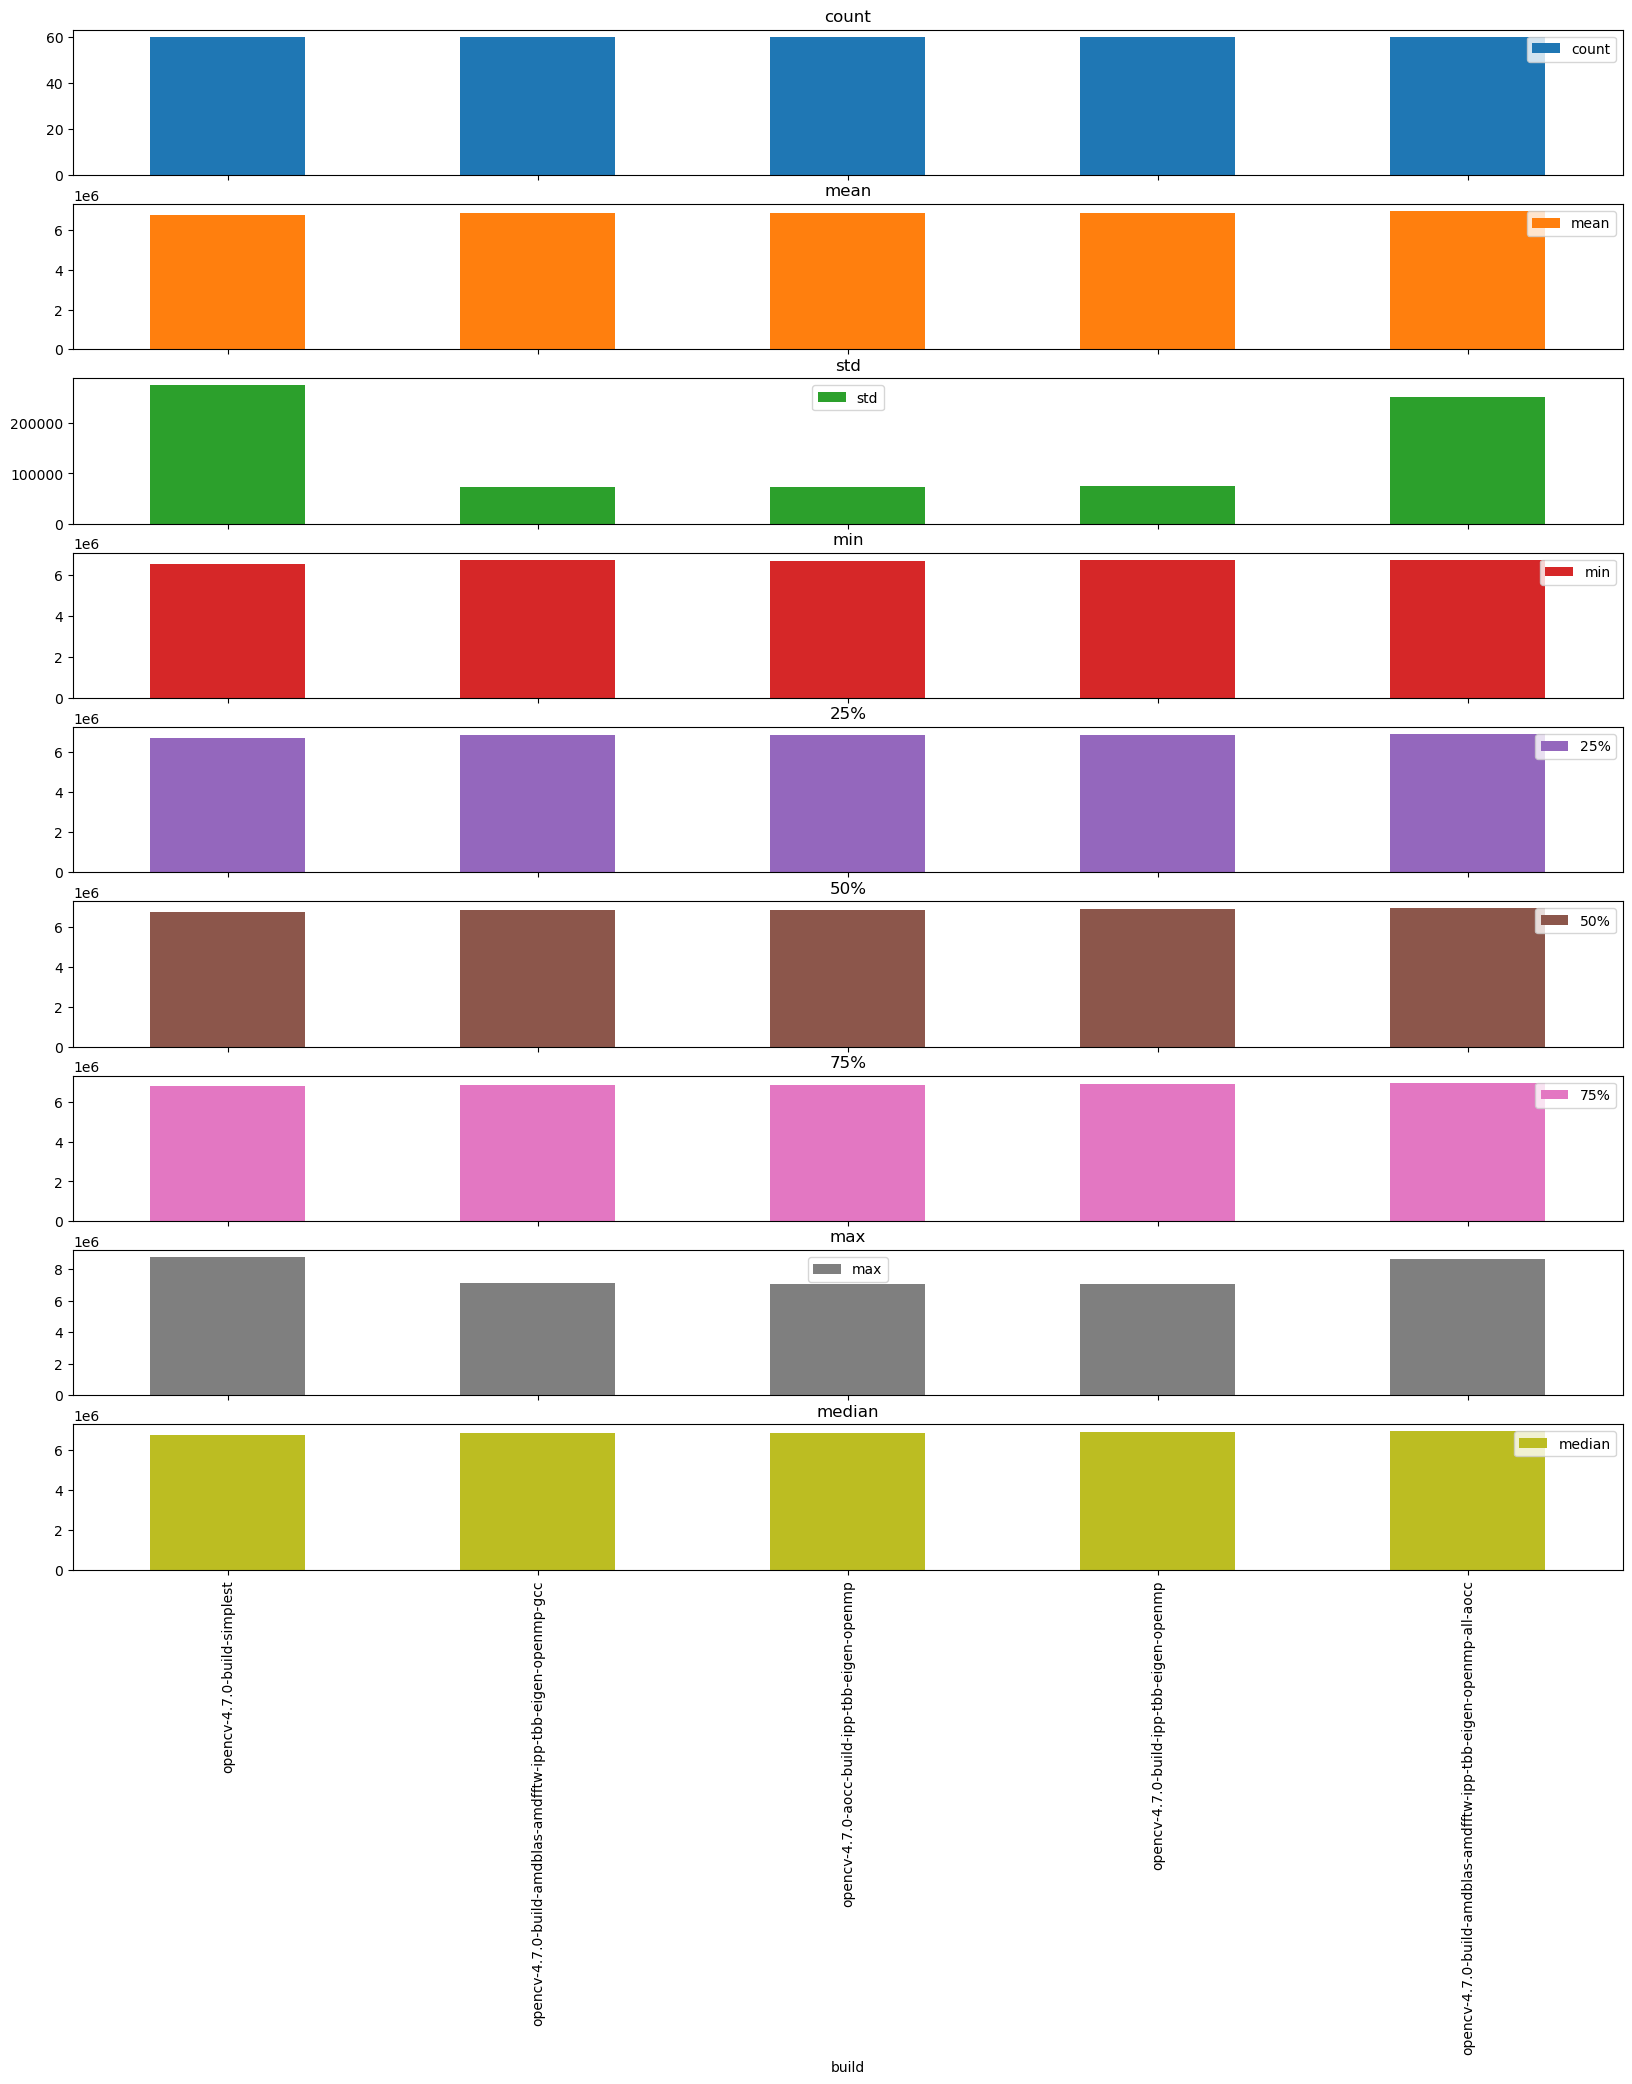

In [26]:
plt = result.plot.bar(subplots=True, figsize=(20,20))

I normalise the medians by subtracting the smallest one from all of them, to make it more obvious how big the difference is between them visually.

In [27]:
min_median = result['median'].min()
normalised = pd.DataFrame(result['median'].apply(lambda m: m - min_median))

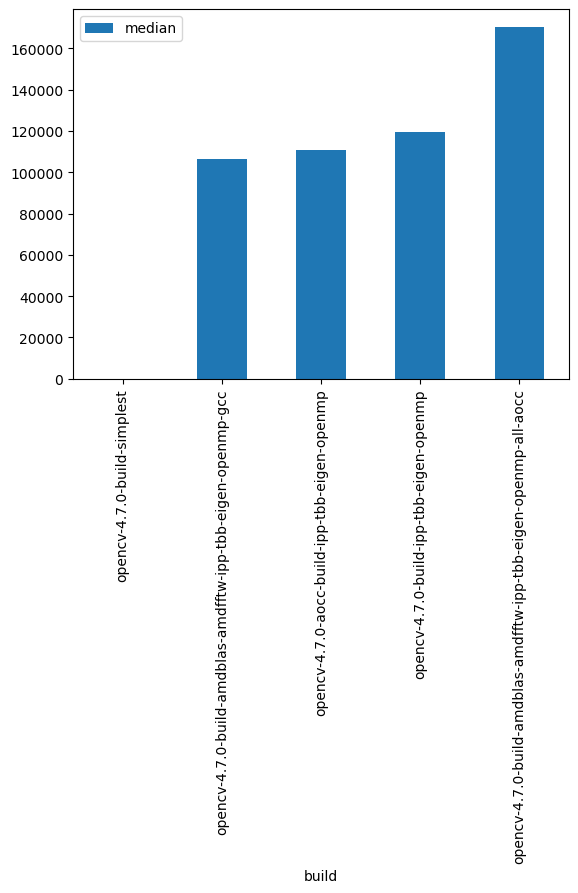

In [28]:
plt = normalised.plot.bar()